In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

# 1--integral 积分

In [2]:
from scipy.integrate import quad,dblquad,nquad
print(quad(lambda x:np.exp(-x),0,np.inf)) 
#一元积分，显示是结果和误差范围

(1.0000000000000002, 5.842606996763696e-11)


In [3]:
print(dblquad(lambda t,x:np.exp(-x*t)/t**3,0,np.inf,lambda x:1,lambda x:np.inf)) 
#二元积分

(0.3333333333366853, 1.3888461883425516e-08)


In [4]:
def f(x,y):
    return x*y
def bound_y():
    return [0,0.5]
def bound_x(y):
    return [0,1-2*y]
print(nquad(f,[bound_x,bound_y]))

(0.010416666666666668, 4.101620128472366e-16)


# 2--optimizer 优化器

In [5]:
from scipy.optimize import minimize
def rosen(x):
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0+(1-x[:-1])**2.0)
x0=np.array([1.3,0.7,0.8,1.9,1.2])
res=minimize(rosen,x0,method="nelder-mead",options={"xtol":1e-8,"disp":True})
print("ROSE MINI:",res.x)

def func(x):
    return -(2*x[0]*x[1]+2*x[0]-x[0]**2-2*x[1]**2)
def func_deriv(x):
    dfdx0=(-2*x[0]+2*x[1]+2)
    dfdx1=(2*x[0]-4*x[1])
    return np.array([dfdx0,dfdx1])
cons=({"type":"eq","fun":lambda x:np.array([x[0]**3-x[1]]),"jac":lambda x:np.array([3.0*(x[0]**2.0),-1.0])},
      {'type':'ineq','fun':lambda x:np.array([x[1]-1]),'jac':lambda x:np.array([0.0,1.0])})
res=minimize(func,[-1.0,1.0],jac=func_deriv,constraints=cons,method='SLSQP',options={'disp':True})
print("RESTRICT:",res)

from scipy.optimize import root
def fun(x):
    return x+2*np.cos(x)
sol=root(fun,0.1)
print("ROOT:",sol.x,sol.fun)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571
ROSE MINI: [1. 1. 1. 1. 1.]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.4643470091836721
            Iterations: 19
            Function evaluations: 121
            Gradient evaluations: 19
RESTRICT:      fun: -0.4643470091836721
     jac: array([ 2.40789883, -2.9949552 ])
 message: 'Optimization terminated successfully.'
    nfev: 121
     nit: 19
    njev: 19
  status: 0
 success: True
       x: array([1.08957877, 1.29352818])
ROOT: [-1.02986653] [0.]


# 3--interpolation 多项式插值

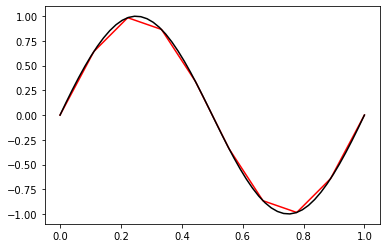

[ 0.00000000e+00  1.31268478e-01  2.58058896e-01  3.79095818e-01
  4.93103803e-01  5.98807414e-01  6.94931212e-01  7.80199759e-01
  8.53337617e-01  9.13069347e-01  9.58119510e-01  9.87213058e-01
  9.99462682e-01  9.95096409e-01  9.74541587e-01  9.38225564e-01
  8.86575689e-01  8.20078818e-01  7.39913600e-01  6.47705004e-01
  5.45085433e-01  4.33687295e-01  3.15143957e-01  1.91245093e-01
  6.41081509e-02 -6.41081509e-02 -1.91245093e-01 -3.15143957e-01
 -4.33687295e-01 -5.45085433e-01 -6.47705004e-01 -7.39913600e-01
 -8.20078818e-01 -8.86575689e-01 -9.38225564e-01 -9.74541587e-01
 -9.95096409e-01 -9.99462682e-01 -9.87213058e-01 -9.58119510e-01
 -9.13069347e-01 -8.53337617e-01 -7.80199759e-01 -6.94931212e-01
 -5.98807414e-01 -4.93103803e-01 -3.79095818e-01 -2.58058896e-01
 -1.31268478e-01 -2.44929360e-16]


In [6]:
x=np.linspace(0,1,10)
y=np.sin(2*np.pi*x)
from scipy.interpolate import interp1d
li=interp1d(x,y,kind="cubic")
x_new=np.linspace(0,1,50)
y_new=li(x_new)
plt.figure()
plt.plot(x,y,"r")
plt.plot(x_new,y_new,"k")
plt.show()
print(y_new)

# 4--linear 线性代数

In [7]:
from scipy import linalg as lg 
arr=np.array([[1,2],[3,4]])
print("det:",lg.det(arr))
print("inv:",lg.inv(arr))
b=np.array([6,14])
print("sol:",lg.solve(arr,b))
print("eig：",lg.eig(arr))
print("qr",lg.qr(arr))
print("svd",lg.svd(arr))

det: -2.0
inv: [[-2.   1. ]
 [ 1.5 -0.5]]
sol: [2. 2.]
eig： (array([-0.37228132+0.j,  5.37228132+0.j]), array([[-0.82456484, -0.41597356],
       [ 0.56576746, -0.90937671]]))
qr (array([[-0.31622777, -0.9486833 ],
       [-0.9486833 ,  0.31622777]]), array([[-3.16227766, -4.42718872],
       [ 0.        , -0.63245553]]))
svd (array([[-0.40455358, -0.9145143 ],
       [-0.9145143 ,  0.40455358]]), array([5.4649857 , 0.36596619]), array([[-0.57604844, -0.81741556],
       [ 0.81741556, -0.57604844]]))
